# Logisitic Regression Classifier with the Digits Dataset

The Digits dataset is composed of hand-written integers from zero to nine. Each sample in the dataset consists of 64 features, each representing the grayscale value of a pixel. The 64 features can be rearranged into an 8x8 grid, which when passed to imshow produce an image of the hand-written integer. The aim of this program is to train a logisitic regression classifier to be able to recognise the hand-written integers in the dataset.

We begin by loading the digits dataset and assigning the X and y variables to the features and target respectively. Then we split the data into training and testing sets and visualise some of the samples.

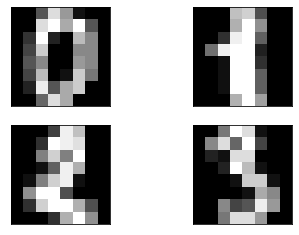

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

digits = datasets.load_digits()
# assign features
# the data consists of 1797 samples
# each sample has 64 features
# the 64 features are greyscale values that can be rearranged into an 8x8 grid to form an image of a number
X = digits.data
y = digits.target

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# visualise first four samples of the data
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8,8), cmap = plt.cm.gray)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Create the logistic regression classifier and fit to the training data. Then compute the confusion matrix and classification report for the training data. We will not bother investigating the effects of regularisation and will use the default value of $C$.

In [8]:
# create logistic regressor
log_reg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
# fit to training data
log_reg.fit(X_train, y_train)
# predict y_train
y_train_pred = log_reg.predict(X_train)
# compute confusion matrix and classification report for training data
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[143   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 137   0   0]
 [  0   5   0   0   0   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   2 149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.97      1.00      0.98       147
           2       1.00      1.00      1.00       141
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       149
           5       1.00      1.00      1.00       136
           6       1.00      1.00      1.00       151
           7       1.00      1.00      1.00       137
           8       0.98      0.96      0.97       136
           9       1.00     

The classifier performance is near perfect for the training data. Now we will see how this compares to performance on the test data.

In [9]:
# predict y_test
y_test_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  1  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  1  0  0  0  0]
 [ 0  1  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 44  0  0  0  2]
 [ 0  0  0  0  0  0 29  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  0  0  1  0  0  2 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.97      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      0.95      0.96        37
           4       1.00      0.94      0.97        32
           5       0.96      0.96      0.96        46
           6       1.00      0.97      0.98        30
           7       0.98      0.98      0.98        42
           8       0.92      0.95      0.94        38
           9       0.87      0.90      0.88        29

    accuracy                           0.96       360
   macro avg       

The classifier performance is still excellent, though not quite as good as for the training set.

Next we go about plotting the Receiver Operating Characteristic (ROC) curves for the different classes. To do this we need to one-hot encode the target test data which consists of a single column of values ranging from 0 to 9. The idea is to convert this column into 10 binary columns that indicate the original value.

In [16]:
# there are 10 possible y values
# in order to plot multiple ROC curves we have to 'one hot encode'
# y_onehot consists of 10 columns, one for each possible y value
# if y_i = 2 for a sample in y, then the third column in y_onehot is assigned a 1 and all the others get a 0
y_onehot = pd.get_dummies(y_test)
# print first 5 rows of y_test and y_onehot for demonstration
print(y_test[:5])
print(y_onehot.iloc[:5,:])

[5 2 5 5 5]
   0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  1  0  0  0  0
1  0  0  1  0  0  0  0  0  0  0
2  0  0  0  0  0  1  0  0  0  0
3  0  0  0  0  0  1  0  0  0  0
4  0  0  0  0  0  1  0  0  0  0


Generate plot and add ROC curves.

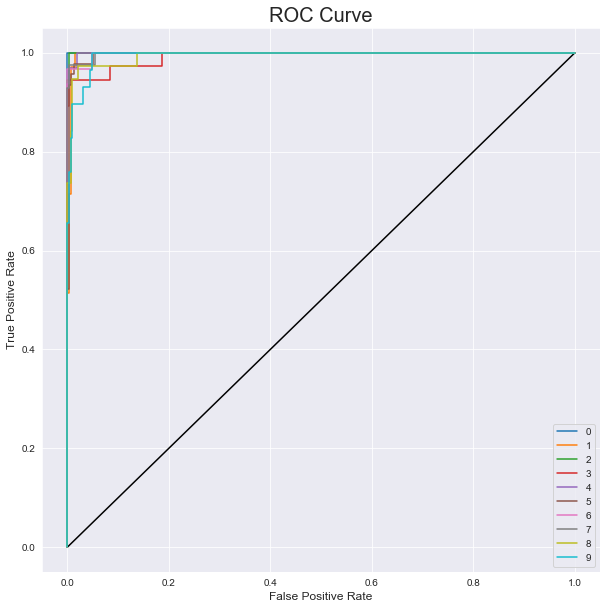

In [20]:
# compute predicted y probabilities from X_test
y_pred_prob = log_reg.predict_proba(X_test)

# create plot and add straight line
sns.set_style('darkgrid')
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(111)
ax2.plot([0, 1], [0, 1], color = 'k')
ax2.set_xlabel('False Positive Rate', fontsize = 12)
ax2.set_ylabel('True Positive Rate', fontsize = 12)
ax2.set_title('ROC Curve', fontsize = 20)

# plot curve for each class
for i in range(y_onehot.shape[1]):
    y_actual = y_onehot.iloc[:, i]
    y_prob = y_pred_prob[:, i]
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    auc_score = roc_auc_score(y_actual, y_prob)

    ax2.plot(fpr, tpr, label = '{}'.format(i))
    
plt.legend()
plt.show()

To finish off we will view as images some of the misclassified samples.

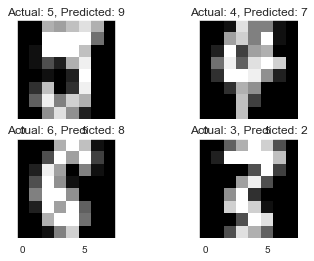

In [22]:
# display first 4 misclassified images
misclss_index = []
# i is index, vals is the zip tuple
for i, vals in enumerate(zip(y_test, y_test_pred)):
    # if y_test != y_test_pred store the index
    if vals[0] != vals[1]:
        misclss_index.append(i)
misclss_index = misclss_index[:4]

# visualise
fig4, axes2 = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes2.ravel()):
    # plot image of the sample in X_test indexed by misclss_index[i]
    # where i runs from 0 to 3
    ax.imshow(X_test[misclss_index[i]].reshape(8,8), cmap = plt.cm.gray)
    # add titles with the corresponding values from y_test and y_test_pred
    ax.set_title('Actual: {}, Predicted: {}'.format(y_test[misclss_index[i]],
                                            y_test_pred[misclss_index[i]]))
    ax.set_yticks([])
    ax.grid(False)